# ***Đồ án môn học Nhập môn Phân tích dữ liệu và Học sâu***

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Hàm tải dữ liệu
def load_data(file_path):
    """Đọc dữ liệu từ file CSV."""
    df = pd.read_csv(file_path)
    return df
file_path = "vietnam_housing_dataset.csv"
df = load_data(file_path)


# **Mô tả dữ liệu**

In [3]:
def describe_data(df, message):
    #Mô tả dữ liệu: thông tin tổng quan và thống kê.#
    print(f"\n{message}")
    print(df.info())
    print(df.describe())


def handle_missing_data(df):
    #Loại bỏ hoặc điền dữ liệu thiếu.
    df.fillna(df.median(numeric_only=True), inplace=True)  # Fill missing values with median
    return df

def remove_outliers(df, column="Price"):
    #Loại bỏ ngoại lệ dựa trên IQR.
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df

def normalize_data(X, y):
    #Chuẩn hóa dữ liệu bằng StandardScaler.
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler_X, scaler_y

def visualize_data(df):
    # Function to visualize distributions
    feature = input("Enter feature to visualize: ")
    if feature in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[feature], bins=30, kde=True)
        plt.title(f"Distribution of {feature}")
        plt.show()
    else:
        print("Feature not found in dataset.")

def main():
    file_path = "vietnam_housing_dataset.csv"
    df = load_data(file_path)
    describe_data(df, "Dữ liệu trước khi xử lý")

    df = handle_missing_data(df)
    df = remove_outliers(df, column="Price")
    describe_data(df, "After Processing")

    # Select numerical features
    df = df.select_dtypes(include=[np.number]).dropna()
    X = df.drop(columns=["Price"], errors="ignore")
    y = df["Price"] if "Price" in df.columns else df.iloc[:, -1]

    #Chuẩn hóa dữ liệu
    X_scaled, y_scaled, scaler_X, scaler_y = normalize_data(X, y)

    #Tách dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

    #Thêm cột năm là 2024 vào csv

    df["Year"] = 2024
    df["Price_Lag_1"] = df["Price"].shift(1)
    df["Price_Lag_1"].fillna(df["Price"].mean(), inplace=True)
    
    #Lưu dữ liệu đã xử lý vào csv mới
    df.to_csv("vietnam_housing_dataset_cleaned_data.csv", index=False)
    print("Cleaned data saved as vietnam_housing_dataset_cleaned_data.csv")

if __name__ == "__main__":
    main()



Dữ liệu trước khi xử lý
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            30229 non-null  object 
 1   Area               30229 non-null  float64
 2   Frontage           18665 non-null  float64
 3   Access Road        16932 non-null  float64
 4   House direction    8990 non-null   object 
 5   Balcony direction  5246 non-null   object 
 6   Floors             26626 non-null  float64
 7   Bedrooms           25067 non-null  float64
 8   Bathrooms          23155 non-null  float64
 9   Legal status       25723 non-null  object 
 10  Furniture state    16110 non-null  object 
 11  Price              30229 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.8+ MB
None
               Area      Frontage   Access Road        Floors      Bedrooms  \
count  30229.000000  18665.000000  16932.000000  26626.000

C:\Users\Windows 11 Pro\AppData\Local\Temp\ipykernel_13284\3836907490.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Price_Lag_1"].fillna(df["Price"].mean(), inplace=True)


Cleaned data saved as vietnam_housing_dataset_cleaned_data.csv


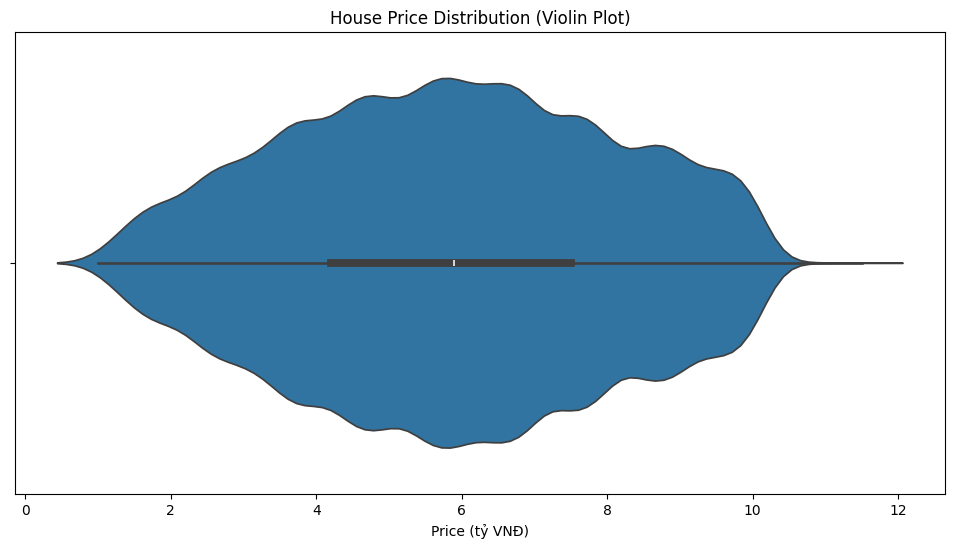

In [4]:
# Biểu đồ phân phối giá nhà violinplot
plt.figure(figsize=(12, 6))
sns.violinplot(x=df["Price"])
plt.title("House Price Distribution (Violin Plot)")
plt.xlabel("Price (tỷ VNĐ)")
plt.show()

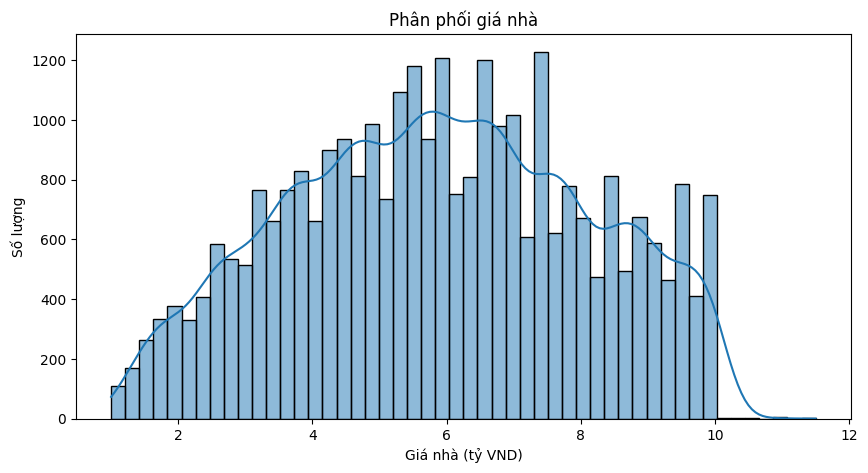

In [5]:
# Biểu đồ phân phối giá nhà
plt.figure(figsize=(10,5))
sns.histplot(df["Price"], bins=50, kde=True)
plt.xlabel("Giá nhà (tỷ VND)")
plt.ylabel("Số lượng")
plt.title("Phân phối giá nhà")
plt.show()

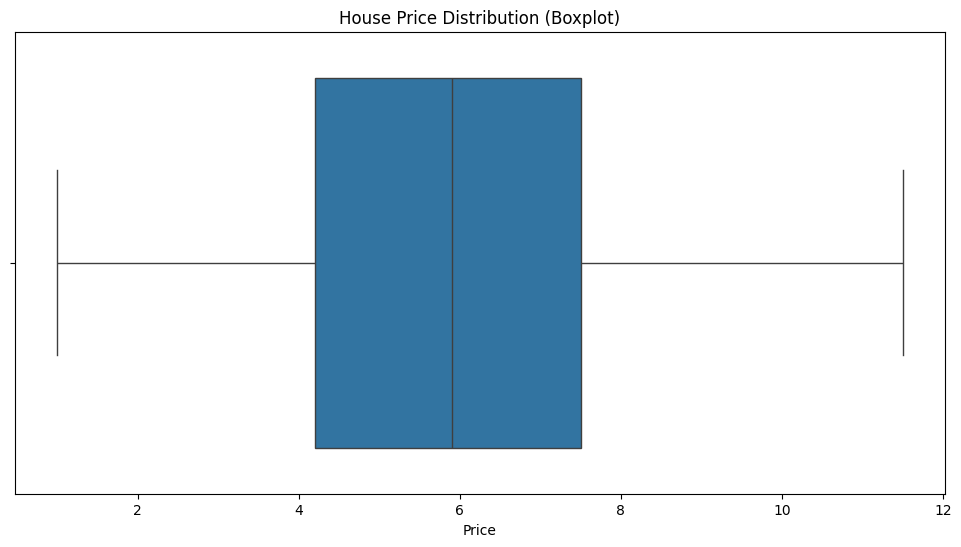

In [6]:
# Biểu đồ phân phối giá nhà dạng boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Price"])
plt.title("House Price Distribution (Boxplot)")
plt.show()

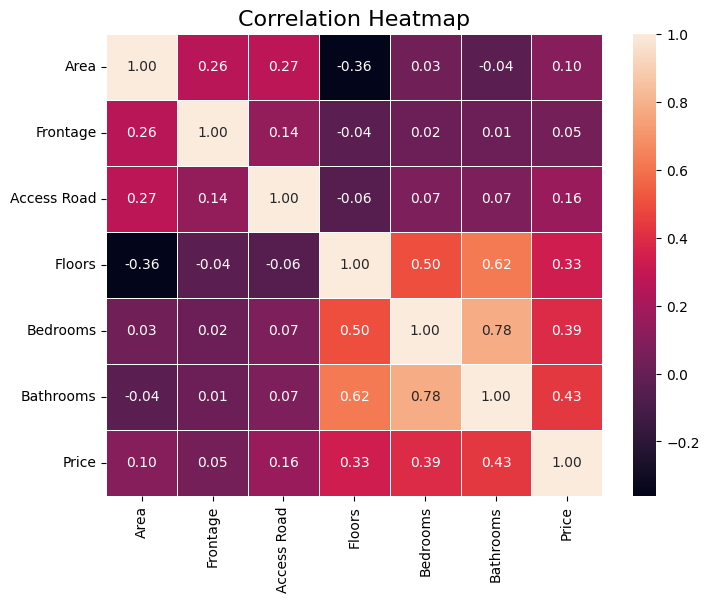

In [7]:
#Biểu đồ Correlation Heatmap
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5, cbar=True)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# ***Phân loại***

In [8]:
#Kiểm tra dữ liệu null
df.isnull().sum()

Address                  0
Area                     0
Frontage             11564
Access Road          13297
House direction      21239
Balcony direction    24983
Floors                3603
Bedrooms              5162
Bathrooms             7074
Legal status          4506
Furniture state      14119
Price                    0
dtype: int64

In [9]:
#Loại bỏ các dữ liệu null
df.fillna({"Legal status": "None", "Furniture state": "None"}, inplace=True)
df.drop("House direction", inplace = True, axis = 1)
df.drop("Balcony direction", inplace = True, axis = 1)

In [10]:
#Tạo ra hai cột Province và Project
df["Province"] = df["Address"].str.split(", ").str[-1].str.replace(".", "")
df["Project"] = df["Address"].str.lower().str.contains("dự án").map({True: 1, False: 0})

df.head()

,Address,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price,Province,Project
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,4.0,NaN,NaN,Have certificate,None,8.60,Hưng Yên,1
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,5.0,NaN,NaN,None,None,7.50,Hưng Yên,1
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,5.0,NaN,NaN,Sale contract,None,8.90,Hưng Yên,1
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,2.0,2.0,3.0,Have certificate,Full,5.35,Hồ Chí Minh,0
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,2.0,4.0,4.0,Have certificate,Full,6.90,Hồ Chí Minh,0


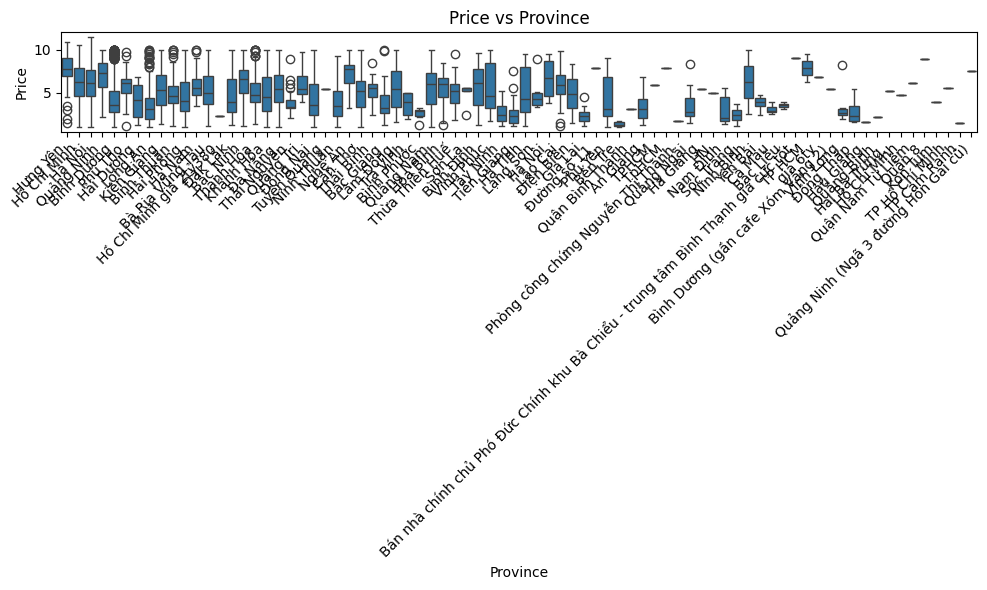

In [11]:
#Tạo boxplot phân tích Price vs Province
plt.figure(figsize=(10, 6))
sns.boxplot(x="Province", y="Price", data=df)
plt.title("Price vs Province")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

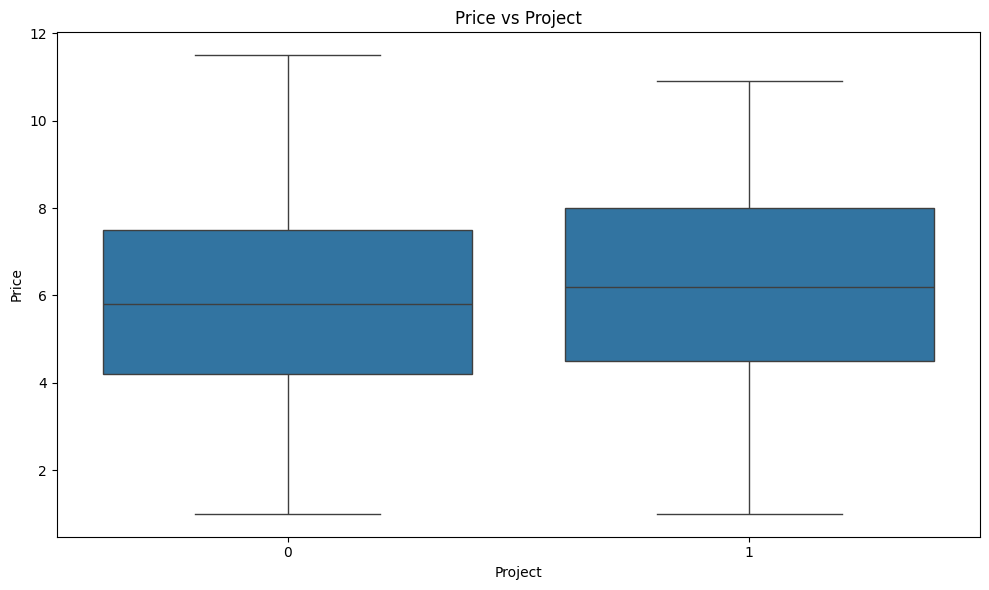

In [12]:
#Tạo boxplot phân tích Price vs Project
plt.figure(figsize=(10, 6))
sns.boxplot(x="Project", y="Price", data=df)
plt.title("Price vs Project")

plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

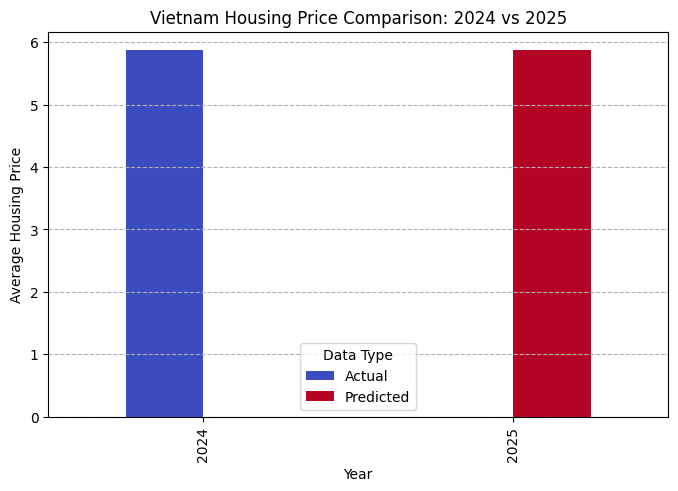

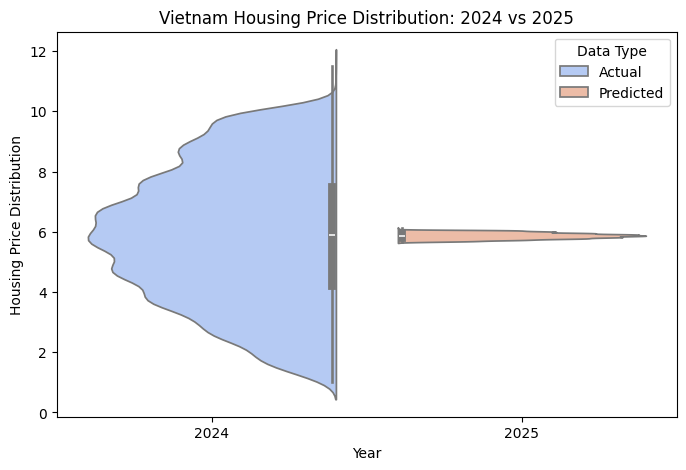

In [13]:
from sklearn.linear_model import LinearRegression

# Load your dataset (modify the path if needed)
df = pd.read_csv("vietnam_housing_dataset_cleaned_data.csv")

#Train a simple Linear Regression model for forecasting 2025 prices
X_train = df[["Year", "Price_Lag_1"]]
y_train = df["Price"]

#Create test data for 2025
X_test = X_train.copy()
X_test["Year"] = 2025

#Train and predict
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_2025 = lin_reg.predict(X_test)

#Store predictions
df_predictions = X_test.copy()
df_predictions["Predicted_Price_2025"] = y_pred_2025

#Combine actual & predicted data for visualization
df_viz = df[["Year", "Price"]].copy()
df_viz = df_viz.rename(columns={"Price": "Housing Price"})
df_pred_viz = df_predictions[["Year", "Predicted_Price_2025"]].copy()
df_pred_viz = df_pred_viz.rename(columns={"Predicted_Price_2025": "Housing Price"})
df_pred_viz["Type"] = "Predicted"
df_viz["Type"] = "Actual"
df_combined = pd.concat([df_viz, df_pred_viz])

#Bar Chart for Average Prices
plt.figure(figsize=(8, 5))
avg_prices = df_combined.groupby(["Year", "Type"])["Housing Price"].mean().unstack()
avg_prices.plot(kind="bar", figsize=(8, 5), colormap="coolwarm")
plt.xlabel("Year")
plt.ylabel("Average Housing Price")
plt.title("Vietnam Housing Price Comparison: 2024 vs 2025")
plt.legend(title="Data Type")
plt.grid(axis="y", linestyle="--")
plt.show()

#Violin Plot for Price Distribution
plt.figure(figsize=(8, 5))
sns.violinplot(x="Year", y="Housing Price", hue="Type", data=df_combined, split=True, palette="coolwarm")
plt.xlabel("Year")
plt.ylabel("Housing Price Distribution")
plt.title("Vietnam Housing Price Distribution: 2024 vs 2025")
plt.legend(title="Data Type")
plt.show()

Feature matrix (X_train): (9599, 6)
Target matrix (y_train): (9599,)
Feature matrix (X_test): (2400, 6)
Target matrix (y_test): (2400,)
Best parameters found: {'activation': 'relu', 'hidden_layer_sizes': (256, 128, 64), 'learning_rate_init': 0.001, 'max_iter': 500}
y_pred: (2400,)
Test MAE: 1.43


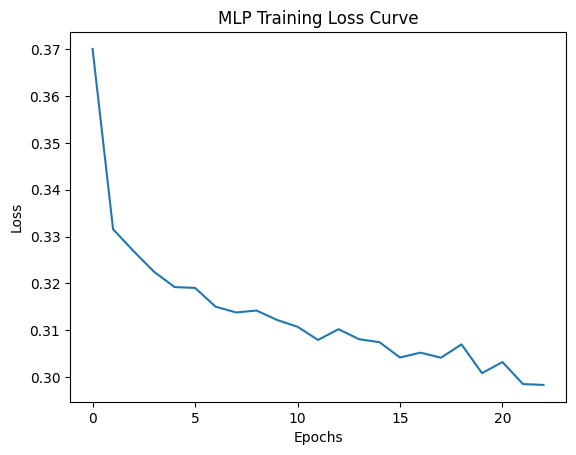

Feature matrix (X_train): (24183, 8)
Target matrix (y_train): (24183,)
Feature matrix (X_test): (6046, 8)
Target matrix (y_test): (6046,)
Best parameters found: {'activation': 'relu', 'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.001, 'max_iter': 500}
y_pred: (6046,)
Test MAE: 1.50


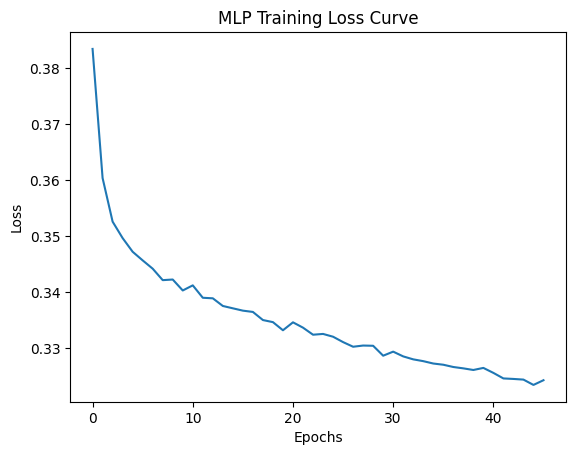

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

def load_data(filename):
    df = pd.read_csv(filename)
    df = df.select_dtypes(include=[np.number]).dropna()  # Ensure only numeric columns
    X = df.drop(columns=["Price"], errors="ignore")  # Features
    y = df["Price"] if "Price" in df.columns else df.iloc[:, -1]  # Target
    
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Function to normalize data
def normalize_data(X_train, X_test, y_train, y_test):
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    # Fit only on training data
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)  # Use the same scaler

    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()  # Use the same scaler

    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_y

def train_mlp(X_train, X_test, y_train, y_test, scaler_y, hidden_layers=(128, 64), max_iter=500):
    param_grid = {
        "hidden_layer_sizes": [(64, 32), (128, 64), (256, 128, 64)],
        "activation": ["relu", "tanh"],
        "learning_rate_init": [0.001, 0.01],
        "max_iter": [500]
    }
    
    mlp = MLPRegressor(solver="adam", random_state=42, early_stopping=True)
    
    grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring="neg_mean_absolute_error", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    print(f"Best parameters found: {grid_search.best_params_}")

    # Predict and inverse transform
    y_pred_scaled = best_model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()  # Convert back

    # Evaluate model
    mae = mean_absolute_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)), y_pred.reshape(-1, 1))
    print(f"y_pred: {y_pred.shape}")
    print(f"Test MAE: {mae:.2f}")

    # Plot learning curve
    plt.plot(best_model.loss_curve_)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("MLP Training Loss Curve")
    plt.show()
    
    return best_model

# Main function
def main():
    # Load the csv file in
    filename1="vietnam_housing_dataset.csv"
    X_train, X_test, y_train, y_test = load_data(filename1)
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_y = normalize_data(X_train, X_test, y_train, y_test)
    # Checking the shape of feature and target matrices
    print("Feature matrix (X_train):", X_train.shape)
    print("Target matrix (y_train):", y_train.shape)
    print("Feature matrix (X_test):", X_test.shape)
    print("Target matrix (y_test):", y_test.shape)
    # Train the MLP model using Scikit-Learn
    train_mlp(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_y, hidden_layers=(128, 64), max_iter=500)
    
    # Load the csv file in
    filename2="vietnam_housing_dataset_cleaned_data.csv"
    X_train, X_test, y_train, y_test = load_data(filename2)
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_y = normalize_data(X_train, X_test, y_train, y_test)
    # Checking the shape of feature and target matrices
    print("Feature matrix (X_train):", X_train.shape)
    print("Target matrix (y_train):", y_train.shape)
    print("Feature matrix (X_test):", X_test.shape)
    print("Target matrix (y_test):", y_test.shape)
    # Train the MLP model using Scikit-Learn
    train_mlp(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_y, hidden_layers=(128, 64), max_iter=500)
    
# Run main function
if __name__ == "__main__":
    main()

In [ ]:
import stumpy

# Đọc dữ liệu từ file
file_path = "vietnam_housing_dataset.csv"
df = pd.read_csv(file_path)

# Kiểm tra dữ liệu
print(df.head())

# Chọn cột giá nhà để phân tích (loại bỏ giá trị NaN)
df = df[["Price"]].dropna()

# Chuyển thành mảng numpy để STUMPY xử lý
price_series = df["Price"].values


                                             Address  Area  Frontage  \
0  Dự án The Empire - Vinhomes Ocean Park 2, Xã L...  84.0       NaN   
1  Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...  60.0       NaN   
2  Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...  90.0       6.0   
3  Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...  54.0       NaN   
4   Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh  92.0       NaN   

   Access Road House direction Balcony direction  Floors  Bedrooms  Bathrooms  \
0          NaN             NaN               NaN     4.0       NaN        NaN   
1          NaN             NaN               NaN     5.0       NaN        NaN   
2         13.0      Đông - Bắc        Đông - Bắc     5.0       NaN        NaN   
3          3.5       Tây - Nam         Tây - Nam     2.0       2.0        3.0   
4          NaN      Đông - Nam        Đông - Nam     2.0       4.0        4.0   

       Legal status Furniture state  Price  
0  Have certificate             NaN

In [16]:
# Xác định độ dài cửa sổ (ví dụ: 50 dữ liệu liên tiếp)
window_size = 50  

# Tính toán ma trận khoảng cách
matrix_profile = stumpy.stump(price_series, m=window_size)

# Tìm vị trí của motif lặp lại
motif_idx = np.argmin(matrix_profile[:, 0])
print(f"Chu kỳ lặp lại được tìm thấy tại vị trí: {motif_idx}")


Chu kỳ lặp lại được tìm thấy tại vị trí: 17630


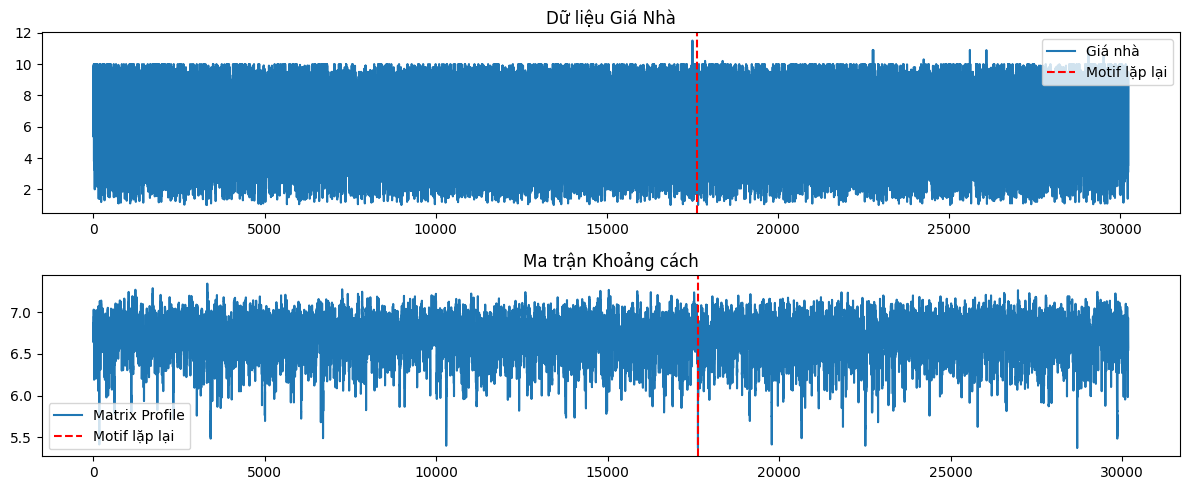

In [17]:
plt.figure(figsize=(12, 5))

# Vẽ giá nhà theo thứ tự
plt.subplot(2, 1, 1)
plt.plot(price_series, label="Giá nhà")
plt.axvline(motif_idx, color="r", linestyle="--", label="Motif lặp lại")
plt.title("Dữ liệu Giá Nhà")
plt.legend()

# Vẽ ma trận khoảng cách
plt.subplot(2, 1, 2)
plt.plot(matrix_profile[:, 0], label="Matrix Profile")
plt.axvline(motif_idx, color="r", linestyle="--", label="Motif lặp lại")
plt.title("Ma trận Khoảng cách")
plt.legend()

plt.tight_layout()
plt.show()
